# 03 - Naive Bayes and KNN

Here, we are going to analyse two models: Naive Bayes and KNN

And, even though the number of records is not that little, we are going to use **k fold cross-validation** with repetition (RepeatedStratifiedKFold), to get a more trustworthy result.

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedStratifiedKFold
import sklearn.metrics as metrics
import itertools
from utils import dataPreparationFunctions as dataPrepare, graphFunctions as graph, modelAnalyzesFunctions as analyzes

In [3]:
data: pd.DataFrame = pd.read_csv('../datasets/covtype_data_preparation.csv', sep=',', decimal='.')
copy_data = data.copy()
y: np.ndarray = copy_data.pop('Cover_Type').values
X: np.ndarray = copy_data.values
labels = pd.unique(y)

data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type-32,Soil_Type-33,Soil_Type-34,Soil_Type-35,Soil_Type-36,Soil_Type-37,Soil_Type-38,Soil_Type-39,Soil_Type-40,Cover_Type
0,0.546773,0.200000,0.454545,0.047960,0.272610,0.367290,0.937008,0.665354,0.161417,0.308518,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.637819,0.891667,0.090909,0.064424,0.223514,0.105381,0.803150,0.921260,0.665354,0.158929,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.716858,0.163889,0.287879,0.125268,0.232558,0.593790,0.905512,0.771654,0.354331,0.500209,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.549775,0.133333,0.106061,0.021475,0.228682,0.437544,0.877953,0.885827,0.543307,0.157814,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.699850,0.519444,0.121212,0.336435,0.295866,0.360264,0.870079,0.968504,0.625984,0.191552,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


## Naive Bayes

The Naive Bayes model uses the "naive" assumption that all variables are conditionally independent. It can get good results, but, in most of the cases, this assumption is violated, so it may be good to use as baseline for the more robust models.

Accuracy for: GaussianNB : 0.4536
Sensitivity for: GaussianNB : 0.4536


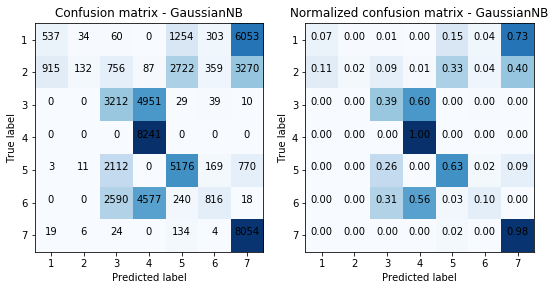

Accuracy for: MultinomialNB : 0.5816
Sensitivity for: MultinomialNB : 0.5816


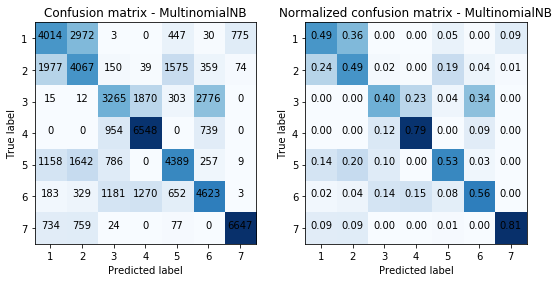

Accuracy for: BernoulyNB : 0.5926
Sensitivity for: BernoulyNB : 0.5926


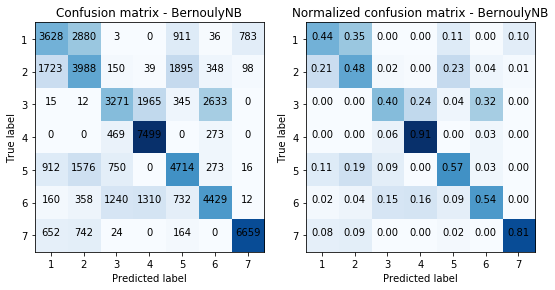

In [4]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
estimators = {'GaussianNB': GaussianNB(), 
              'MultinomialNB': MultinomialNB(), 
              'BernoulyNB': BernoulliNB()}

n_splits = 4
n_repeats = 3

rskf = RepeatedStratifiedKFold(n_splits, n_repeats, random_state=42)

accuracy, sensitivity = analyzes.naive_bayes_analyzes(X, y, labels, estimators, rskf, average='micro')

The label 4 (Cottonwood/Willow) got classified right at most of the cases regardless the estimator (even 100% at the times in the Gaussian one). But, overall, the accurary and the sensitivity are low, which may indicate that the naive approach (considering that the variables are independent) isn't a good one. One clear example of the violation of the assumption is that the binary values (`Soil_Type` and `Wilderness_Area`) are related to each other (just one of each category can have value 1).

We will try other models to see if they get a better result.

## KNN

KNN is a model that classifies the records according to the k nearest neighbors from the testing record. So, we will run the model with three different distance criterios (manhattan, euclidean and chebyshev) and varying the number of neighbors.

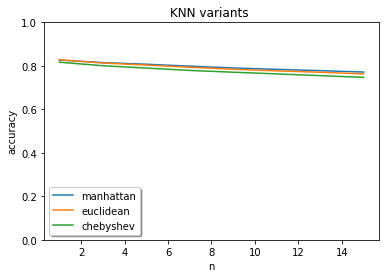

Accuracy for n equal to 1 : 0.8267
Sensitivity for n equal to 1 : 0.8267 

Accuracy for n equal to 3 : 0.8149
Sensitivity for n equal to 3 : 0.8149 

Accuracy for n equal to 5 : 0.8074
Sensitivity for n equal to 5 : 0.8074 

Accuracy for n equal to 7 : 0.7987
Sensitivity for n equal to 7 : 0.7987 

Accuracy for n equal to 9 : 0.7903
Sensitivity for n equal to 9 : 0.7903 

Accuracy for n equal to 11 : 0.7840
Sensitivity for n equal to 11 : 0.7840 

Accuracy for n equal to 13 : 0.7778
Sensitivity for n equal to 13 : 0.7778 

Accuracy for n equal to 15 : 0.7716
Sensitivity for n equal to 15 : 0.7716 



In [5]:
from sklearn.neighbors import KNeighborsClassifier

n_splits = 4
n_repeats = 3
nvalues = [1, 3, 5, 7, 9, 11, 13, 15]
dist = ['manhattan', 'euclidean', 'chebyshev']

accuracy, sensitivity = analyzes.knn_analyzes(X, y, nvalues, dist, rskf, average='micro')

KNN doesn't assume that the variables are independent, instead of that it just use the closest records of each other to make the classification. Having a better result on this model can be explained by a target class more correlated to its features, which cause the "neighborhood" of the record to be significative to predict the class.